In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series
A Series is a one-dimensional array-like object containing a sequence of values (of
similar types to NumPy types) and an associated array of data labels, called its index.

In [ ]:
series_obj = pd.Series([4, 7, -5, 3])
series_obj

In [ ]:
series_obj.values

In [ ]:
series_obj.index = ["aval", "dovom", "sevom", "charom"]

In [ ]:
series_obj["dovom"]

In [ ]:
series_obj[series_obj > 3]

In [ ]:
np.exp(series_obj)

In [ ]:
"aval" in series_obj

In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000, 'Tehran': None}
indx = ["C", 'Ohio', 'Texas']
states = pd.Series(sdata, index=indx)
states

In [ ]:
new_states = pd.Series(sdata)
new_states

In [ ]:
states + new_states

In [ ]:
states[states.isnull()]  = 2000
states

## DataFrame

In [122]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002, 2003],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}

In [124]:
df = pd.DataFrame(data, columns=['year', 'state', 'pop'])
df

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [ ]:
df.rename(columns={'year': 'sali'}, inplace=True)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
type(df['sali'])

In [ ]:
df.sali

## Import data

In [113]:
iris_df = pd.read_csv('iris.csv')

In [126]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
iris_df.shape

(150, 5)

In [130]:
iris_df['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [131]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [132]:
tips_df = pd.read_csv('tips.csv')

In [133]:
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [134]:
tips_df.shape

(244, 7)

## Reshaping Data

In [3]:
data_dic = {
            "Name": ['Ali', 'Reza', 'Maryam', 'Ghasem'], 
            "Age": [25, 46, 34,32], 
            "Gender": ['M', 'M', 'F', 'M'], 
            'Smoking': [True, False, False, True]
}

df = pd.DataFrame(data_dic)

In [4]:
df.head()

,Name,Age,Gender,Smoking
0,Ali,25,M,True
1,Reza,46,M,False
2,Maryam,34,F,False
3,Ghasem,32,M,True


In [19]:
## melt
pd.melt(df, id_vars=['Name', 'Gender'], value_vars='Smoking', value_name='values')

,Name,Gender,variable,values
0,Ali,M,Smoking,True
1,Reza,M,Smoking,False
2,Maryam,F,Smoking,False
3,Ghasem,M,Smoking,True


In [168]:
df_test = pd.DataFrame({'key': ['foo', 'bar', 'baz'], 'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
melted = pd.melt(df_test, ['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [172]:
df_test

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [176]:
## pivot
x = melted.pivot('key', 'variable', 'value')
x

/tmp/ipykernel_9803/1326429945.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  x = melted.pivot('key', 'variable', 'value')


variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [23]:
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [26]:
sample1_df = gapminder[['country','pop']]
sample1_df.shape

(1704, 2)

In [27]:
pd.pivot_table(sample1_df, values='pop', columns='country')

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,Yemen Rep.,Zambia,Zimbabwe
pop,1.582372e+07,2.580249e+06,1.987541e+07,7.309390e+06,2.860224e+07,14649312.5,7.583298e+06,373913.166667,9.075540e+07,9.725119e+06,...,1.436105e+07,5.608780e+07,228211232.5,2.912487e+06,1.512980e+07,5.456857e+07,1848606.5,1.084319e+07,6.353805e+06,7.641966e+06


In [31]:
sample2_df = gapminder[['continent', 'year','pop']]
pd.pivot_table(sample2_df, values='pop', index=['year'], columns='continent', aggfunc='mean')

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,4.570010e+06,13806097.84,4.228356e+07,1.393736e+07,5343003.0
1957,5.093033e+06,15478156.64,4.735699e+07,1.459635e+07,5970988.0
1962,5.702247e+06,17330810.16,5.140476e+07,1.534517e+07,6641759.0
1967,6.447875e+06,19229864.92,5.774736e+07,1.603930e+07,7300207.0
1972,7.305376e+06,21175368.40,6.518098e+07,1.668784e+07,8053050.0
1977,8.328097e+06,23122707.96,7.225799e+07,1.723882e+07,8619500.0
1982,9.602857e+06,25211636.80,7.909502e+07,1.770890e+07,9197425.0
1987,1.105450e+07,27310158.84,8.700669e+07,1.810314e+07,9787207.5
1992,1.267464e+07,29570964.16,9.494825e+07,1.860476e+07,10459825.5


In [145]:
## concat

df2 = pd.DataFrame({"Address": ["Tehran", "Shiraz", np.nan, "Kerman"]})
pd.concat([df, df2], axis=1)

,Name,Age,Gender,Smoking,Address
0,Ali,25,M,True,Tehran
1,Reza,46,M,False,Shiraz
2,Maryam,34,F,False,NaN
3,Ghasem,32,M,True,Kerman


In [155]:
df3 = pd.DataFrame({
            "Name": ['Mohsen', 'Mina', 'Arad', 'Davoud'], 
            "Age": [54, 31, 46,32], 
            "Gender": ['M', 'F', 'M', 'M'], 
            'Smoking': [True, np.nan, False, False],
            'A': [1, 2, 3, 4]
})
pd.concat([df, df3])
example = pd.concat([df, df3]).reset_index(drop=True)

In [ ]:
## append  (deprecated)
new_row = {'Name':'Ali', 'Age':25, 'Gender':'M', 'Smoking':True}
df.append(new_row, ignore_index=True)

In [151]:
df.drop(columns=['Name'])

,Age,Gender,Smoking
0,25,M,True
1,46,M,False
2,34,F,False
3,32,M,True


## Method chaining

In [157]:
df_chain = pd.DataFrame(
        {"a" : [4 ,5, 6],
        "b" : [7, 8, 9],
        "c" : [10, 11, 12]})
print("before \n")
print(df_chain)


df_chain = (pd.melt(df_chain)
    .rename(columns={
                'variable' : 'var',
                'value' : 'val'})
    .query('val >= 8')
)
df_chain

before 

   a  b   c
0  4  7  10
1  5  8  11
2  6  9  12


,var,val
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


## Sort

In [159]:
df.sort_values('Age', ascending=False)

,Name,Age,Gender,Smoking
1,Reza,46,M,False
2,Maryam,34,F,False
3,Ghasem,32,M,True
0,Ali,25,M,True


In [160]:
df.sort_values(['Age', 'Name'], ascending=[1, 0])

,Name,Age,Gender,Smoking
0,Ali,25,M,True
3,Ghasem,32,M,True
2,Maryam,34,F,False
1,Reza,46,M,False


## Subset Rows/Columns

In [180]:
df

,Name,Age,Gender,Smoking
0,Ali,25,M,True
1,Reza,46,M,False
2,Maryam,34,F,False
3,Ghasem,32,M,True


In [183]:
df[(df.Age > 30) & (df.Gender == "M")]

,Name,Age,Gender,Smoking
1,Reza,46,M,False
3,Ghasem,32,M,True


In [178]:
df[df.Age > 35]

,Name,Age,Gender,Smoking
1,Reza,46,M,False


In [187]:
df.sample(frac=0.2)

,Name,Age,Gender,Smoking
3,Ghasem,32,M,True


In [197]:
# df[~df.duplicated()]
df.drop_duplicates()

,Name,Age,Gender,Smoking
0,Ali,25,M,True
1,Reza,46,M,False
2,Maryam,34,F,False
3,Ghasem,32,M,True


In [213]:
x = df.iloc[:, 2:]
x.iloc[3, 0] = 'F'
x

,Gender,Smoking
0,M,True
1,M,False
2,F,False
3,F,True


In [218]:
df

,Name,Age,Gender,Smoking
0,Ali,25,M,True
1,Reza,46,M,False
2,Maryam,34,F,False
3,Ghasem,32,M,True


In [234]:
df.index = ['a', 'b', 'c', 'd']
# df.reindex([2, 3, 1, 4])
df.loc['a','Name']

'Ali'

## Handling Missing Data and Cleaning

In [241]:
x = pd.concat([df, pd.DataFrame({"Name": ["Akbar"]})])
x

,Name,Age,Gender,Smoking
0,Ali,25.0,M,True
1,Reza,46.0,M,False
2,Maryam,34.0,F,False
3,Ghasem,32.0,M,True
0,Akbar,NaN,NaN,NaN


In [240]:
x.dropna(inplace = False, axis=0)

,Name,Age,Gender,Smoking
0,Ali,25.0,M,True
1,Reza,46.0,M,False
2,Maryam,34.0,F,False
3,Ghasem,32.0,M,True


In [243]:
mean_age = df["Age"].mean().astype("int8")
x.fillna(mean_age, inplace = False)

,Name,Age,Gender,Smoking
0,Ali,25.0,M,True
1,Reza,46.0,M,False
2,Maryam,34.0,F,False
3,Ghasem,32.0,M,True
0,Akbar,34.0,34,34


In [244]:
x.fillna({"Age": mean_age})

,Name,Age,Gender,Smoking
0,Ali,25.0,M,True
1,Reza,46.0,M,False
2,Maryam,34.0,F,False
3,Ghasem,32.0,M,True
0,Akbar,34.0,NaN,NaN


In [ ]:
pd.concat([df] * 2).duplicated()

In [ ]:
pd.concat([df] * 2).drop_duplicates()

In [ ]:
pd.concat([df] * 2).drop_duplicates(['Age', 'Name'], keep='last')

### Data Transformation

In [ ]:
df['Name'].str.lower()

In [104]:
map_names = {"Ali": "AL", "Reza": "RE", "Maryam": "MA", "Ghasem": "GH"}
df['Name'].map(lambda x: map_names[x])

0    AL
1    RE
2    MA
3    GH
Name: Name, dtype: object

## Summarize Data

In [257]:
df.iloc[1, 1] = 25

In [258]:
# Count number of rows with each unique value of variable
df['Age'].value_counts()

25    2
34    1
32    1
Name: Age, dtype: int64

In [261]:
df.nunique()

Name       4
Age        3
Gender     3
Smoking    2
dtype: int64

In [91]:
# # of rownuniquein DataFrame.
len(df)

4

## String Manipulation

In [263]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}

In [264]:
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [108]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [109]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [270]:
df[df['Name'].str.contains('A')]

,Name,Age,Gender,Smoking
0,Ali,25,M,True


In [110]:
pattern = '([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [112]:
import re
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [117]:
data.str.match(pattern, flags=re.IGNORECASE)

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

## Map

In [274]:
df

,Name,Age,Gender,Smoking
0,Ali,25,M,True
1,Reza,25,25,False
2,Maryam,34,F,False
3,Ghasem,32,M,True


In [294]:
maped_data = {"M": "10", "F": "01"}

# df["Smoking"].map(lambda x: maped_data[x])
# df["Name"].map(lambda x: x[:2])
df["Gender"].map(maped_data)

# iris_df["total"]

sepal_length
sepal_width
petal_length
petal_width
class
total


In [295]:
for elm in iris_df:
    print(elm)

sepal_length
sepal_width
petal_length
petal_width
class
total


In [ ]:
for indx in iris_df.index:
    temp = iris_df["petal_length"][indx] + iris_df["petal_width"][indx]
    if temp > 5:
        print("bozorgtar az 5")
    else:
        print("kochiktar az 5")

## apply

In [34]:
df

,Name,Age,Gender,Smoking
0,Ali,25,M,True
1,Reza,46,M,False
2,Maryam,34,F,False
3,Ghasem,32,M,True


In [45]:
def f(x):
    if (x[1] > 30) and ('a' in x[0].lower()):
        return True
    else:
        return False
    
# df["mojaz"] = df["Age"].apply(f, axis=1)
df['jadid'] = df.apply(f, axis='columns')
df

,Name,Age,Gender,Smoking,jadid
0,Ali,25,M,True,False
1,Reza,46,M,False,True
2,Maryam,34,F,False,True
3,Ghasem,32,M,True,True


## Grouping

In [297]:
tips_df.head(4)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [303]:
tips_df.groupby('sex').total_bill.mean()

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

In [304]:
tips_df.groupby(['sex', 'time']).tip.mean()

sex     time  
Female  Dinner    3.002115
        Lunch     2.582857
Male    Dinner    3.144839
        Lunch     2.882121
Name: tip, dtype: float64

In [121]:
tips_df['normal bill'] = tips_df['total_bill'] / tips_df.total_bill.max()
tips_df

,total_bill,tip,sex,smoker,day,time,size,normal bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.334383
1,10.34,1.66,Male,No,Sun,Dinner,3,0.203503
2,21.01,3.50,Male,No,Sun,Dinner,3,0.413501
3,23.68,3.31,Male,No,Sun,Dinner,2,0.466050
4,24.59,3.61,Female,No,Sun,Dinner,4,0.483960
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.571344
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.534934
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.446172
242,17.82,1.75,Male,No,Sat,Dinner,2,0.350718


## Merge (Join)

In [51]:
pd.options.display.max_rows = 5

In [79]:
unames = ['id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python')
users

,id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
...,...,...,...,...,...
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [68]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python')
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
...,...,...,...,...
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [104]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',header=None, names=mnames, engine='python')
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
...,...,...,...
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [105]:
movies['year'] = movies['title'].apply(lambda x: x[-5:-1])
movies

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
...,...,...,...,...
3881,3951,Two Family House (2000),Drama,2000
3882,3952,"Contender, The (2000)",Drama|Thriller,2000


In [106]:
all_genres = set() 

def f(x: str):
    for elm in x.split("|"):
        all_genres.add(elm)

movies['genres'].apply(f)

0       None
1       None
        ... 
3881    None
3882    None
Name: genres, Length: 3883, dtype: object

In [107]:
for genre in all_genres:
    movies[genre] = False
movies

,movie_id,title,genres,year,Fantasy,Drama,Adventure,Action,Comedy,Romance,...,Mystery,Horror,Sci-Fi,Crime,Documentary,Children's,Animation,Thriller,Western,Film-Noir
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3951,Two Family House (2000),Drama,2000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3882,3952,"Contender, The (2000)",Drama|Thriller,2000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
def f():
    for genere in all_genres:
        movies[genere] = movies['genres'].apply(lambda x: True if genere in x else False)

        
%timeit -n 10 f()


print(id(movies))
def edit_genre(x):
    for elm in x['genres'].split('|'):
        x[elm] = True
    return x
        
%timeit -n 10 movies.apply(edit_genre, axis=1)
print(id(movies))
movies

48.1 ms ± 8.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
140511279156288
430 ms ± 115 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
140511279156288


,movie_id,title,genres,year,Fantasy,Drama,Adventure,Action,Comedy,Romance,...,Mystery,Horror,Sci-Fi,Crime,Documentary,Children's,Animation,Thriller,Western,Film-Noir
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3951,Two Family House (2000),Drama,2000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3882,3952,"Contender, The (2000)",Drama|Thriller,2000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [101]:
movies

,movie_id,title,genres,year,Fantasy,Drama,Adventure,Action,Comedy,Romance,...,Mystery,Horror,Sci-Fi,Crime,Documentary,Children's,Animation,Thriller,Western,Film-Noir
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3951,Two Family House (2000),Drama,2000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3882,3952,"Contender, The (2000)",Drama|Thriller,2000,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [74]:
ratings.loc[1000208, 'user_id'] = np.nan
ratings

,user_id,movie_id,rating,timestamp
0,1.0,1193,5,978300760
1,1.0,661,3,978302109
...,...,...,...,...
1000207,6040.0,1096,4,956715648
1000208,NaN,1097,4,956715569


In [81]:
pd.merge(users, ratings, left_on='id', right_on='user_id')

,id,gender,age,occupation,zip,user_id,movie_id,rating,timestamp
0,1,F,1,10,48067,1.0,1193,5,978300760
1,1,F,1,10,48067,1.0,661,3,978302109
...,...,...,...,...,...,...,...,...,...
1000206,6040,M,25,6,11106,6040.0,562,5,956704746
1000207,6040,M,25,6,11106,6040.0,1096,4,956715648


## plot

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

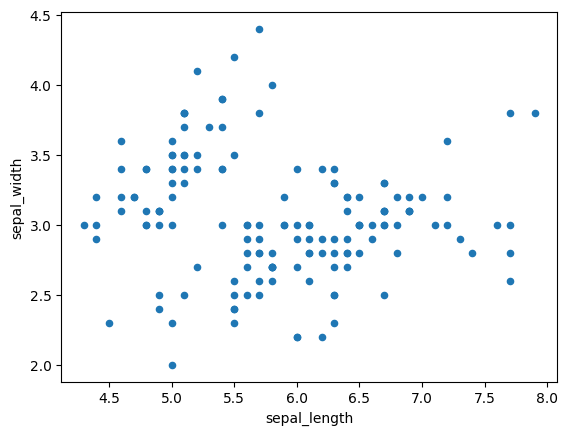

In [119]:
iris_df.plot.scatter(x='sepal_length', y = 'sepal_width')